In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM


In [121]:

window=1

df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [122]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
input_size=len(df.iloc[1,:])
print(input_size)

4


In [123]:
stock = df
seq_len = window
amount_of_features = len(stock.columns)  # Number of columns/features
data = stock.values  # Convert DataFrame to matrix
sequence_length = seq_len + 1  # Sequence length (5 + 1)
result = []
for index in range(len(data) - sequence_length):  # Loop 170 - 5 times
    result.append(data[index: index + sequence_length])  # From the ith row to i + 5
result = np.array(result)  # Get 161 samples, each sample is shaped as 6 days * 3 features
row = round(0.9 * result.shape[0])  # Split into training and testing sets
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:, -1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:, -1]
# Reshape into 5 days * 3 features
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))


In [124]:

d = 0.2
model = Sequential()
model.add(LSTM(1024, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
#model.add(Dense(4,init='uniform',activation='relu'))  
model.add(Dense(32, kernel_initializer='uniform'))
model.add(Activation('relu'))

#model.add(Dense(1,init='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('relu'))


model.compile(loss='mse',optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=256) 

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.1352
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0010
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.7493e-04
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.5672e-04
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.4951e-04
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 1.4241e-04
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 1.3569e-04
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.2308e-04
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 1.1756e-04
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.1187e-04
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 1.1235e-04
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.0935e-04
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 1.1308e-04
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 1.0998e-04
Epoch 15/50
93/93 ━━━━━

In [125]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 1024)           │     4,214,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,742,853 (48.61 MB)

 Trainable params: 4,247,617 (16.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,495,236 (32.41 MB)

In [126]:

y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


Text(0.5, 1.0, 'Train Data')

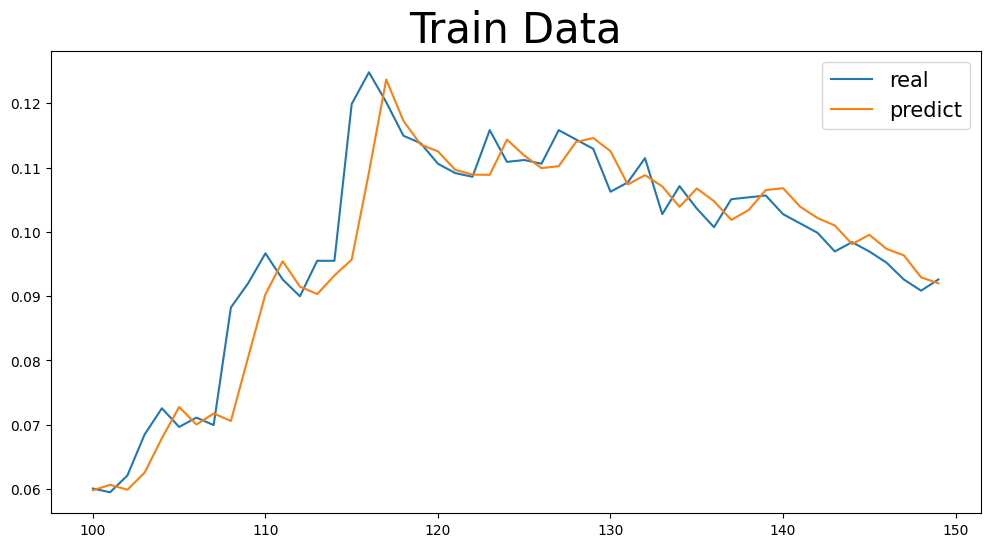

In [127]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') 

#Show the performance on the training set

In [128]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Text(0.5, 1.0, 'Test Data')

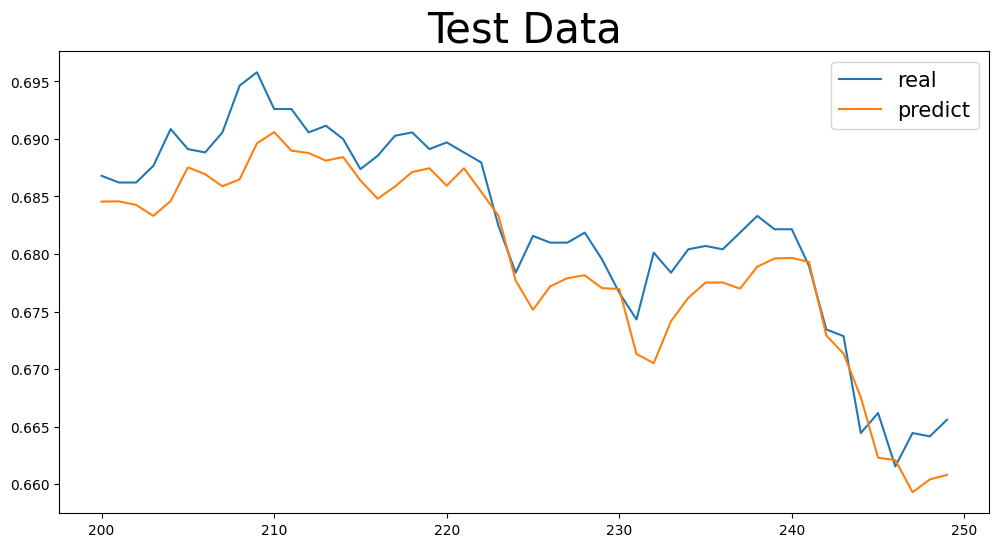

In [129]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 
